## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
import numpy as np

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 建立模型四步驟

在 Scikit-learn 中，建立一個機器學習的模型其實非常簡單，流程大略是以下四個步驟

1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
    - **使用 pandas 讀取 .csv 檔：**pd.read_csv
    - **使用 numpy 讀取 .txt 檔：**np.loadtxt 
    - **使用 Scikit-learn 內建的資料集：**sklearn.datasets.load_xxx
    - **檢查資料數量：**data.shape (data should be np.array or dataframe)
2. 將資料切為訓練 (train) / 測試 (test)
    - train_test_split(data)
3. 建立模型，將資料 fit 進模型開始訓練
    - clf = DecisionTreeClassifier()
    - clf.fit(x_train, y_train)
4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
    - clf.predict(x_test)
    - accuracy_score(y_test, y_pred)
    - f1_score(y_test, y_pred)

In [2]:
# 讀取房價資料集
boston = datasets.load_boston()

X = boston.data
Y = boston.target

threshold = Y.mean()
print('threshold: %s'%threshold)
print('predict that the price is > %s or not'%threshold)
# plt.boxplot(y_train)
y_transfer = np.where(Y>threshold, 1, 0)
y_transfer

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, y_transfer, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

threshold: 22.532806324110677
predict that the price is > 22.532806324110677 or not


In [3]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8582677165354331


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.11882349 0.01318108 0.01634978 0.00732282 0.05814392 0.07096093
 0.03678471 0.01090102 0.         0.00940806 0.05239238 0.04114729
 0.56458451]


In [6]:
# 建立回歸模型
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)

print("Decision Tree Regressor Acuuracy: ", acc)

Decision Tree Regressor Acuuracy:  0.8267716535433071


# Wine

In [7]:
wine = datasets.load_wine()
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# 讀取wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [9]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8888888888888888


In [10]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [11]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01364138 0.         0.         0.         0.04405085 0.04296585
 0.0184594  0.         0.         0.36779083 0.         0.12444169
 0.38865   ]


In [12]:
# 建立回歸模型
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)

print("Decision Tree Regressor Acuuracy: ", acc)

Decision Tree Regressor Acuuracy:  0.9777777777777777


# logistic Regression

In [87]:
from sklearn import linear_model
# 建立模型--用羅吉斯回歸
logreg = linear_model.LogisticRegression(solver='liblinear',multi_class='auto',random_state=4)

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

In [88]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9333333333333333


## Logisitc Regression 比 Decision Tree準確

# 調整參數
- max_depth = 5

In [24]:
# 讀取wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, min_samples_leaf=5)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [25]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9777777777777777


In [28]:
x_train.shape
# wine.feature_names

(133, 13)

# 決策樹的圖形

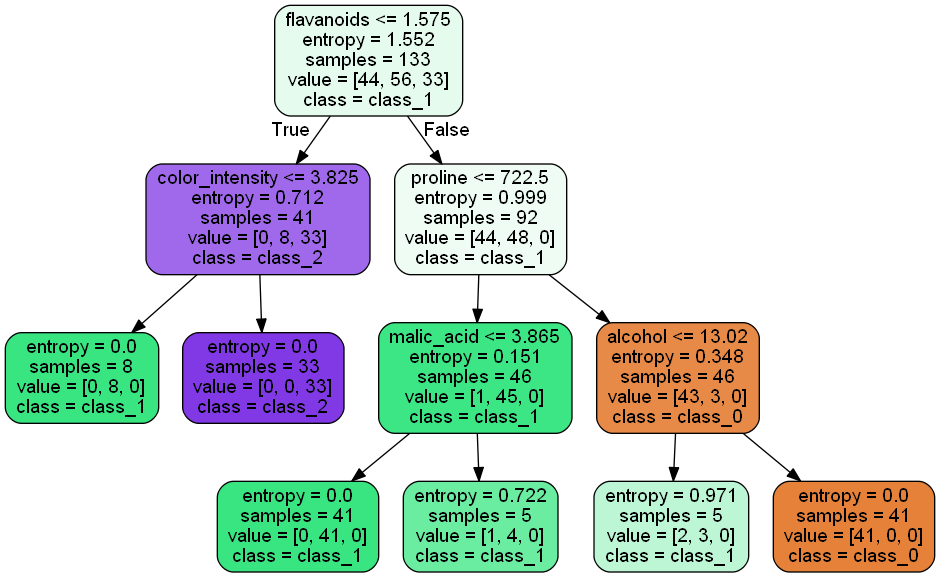

In [27]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = export_graphviz(
    clf, 
    filled=True,
    rounded=True,
    class_names=wine.target_names,
    feature_names=wine.feature_names,
    out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

from IPython.display import Image
Image(filename = 'tree.png', width=1000)